# Assignment 2 - Machine Learning Basics

## *Joseph Krinke*
Netid:  *Jdk61*

Instructions for all assignments can be found [here](https://github.com/kylebradbury/ids705/blob/master/assignments/_Assignment%20Instructions.ipynb), which is also linked to from the [course syllabus](https://kylebradbury.github.io/ids705/index.html).

## Learning Objectives:
This assignment will provide structured practice to help enable you to...
- Implement a k-nearest neighbors machine learning algorithm from scratch in a style similar to that of popular machine learning tools like `scikit-learn`
- Apply basic regression and classification supervised learning techniques to data and evaluate the performance of those methods
- Understand the bias-variance tradeoff and the impact of model flexibility algorithm performance and model selections

# Conceptual Questions

## 1
**[5 points]**
For each part (a) through (d), indicate whether we would generally expect the performance of a flexible statistical learning method to be better or worse than an inflexible method. Justify your answer.

1. The sample size $n$ is extremely large, and the number of predictors $p$ is small.
2. The number of predictors $p$ is extremely large, and the number of observations $n$ is small.
3. The relationship between the predictors and response is highly non-linear.
4. The variance of the error terms, i.e. $\sigma^2 = Var(\epsilon)$, is extremely high

**ANSWER**

(a) A flexible method will be better. The flexible method will fit the data better. Additionally, having a large amount of data will reduce the chance you overfit to a small fluctuation in the data due to sampling. 

(b) A flexible method will be worse. Having a small amount of data means it is likely you will overfit the model to due to random error.

(c) A flexible method will be better. The flexible method has more possible "knobs to turn" that would allow it to better approximate the non-linearity. 

(d) A flexible method will be worse. A more flexible model will overfit and model the large error in the data rather the true signal. 

## 2
**[5 points]** For each of the following, (i) explain if each scenario is a classification or regression problem, (ii) indicate whether we are most interested in inference or prediction for that problem, and (iii) provide the sample size $n$ and number of predictors $p$ indicated for each scenario.

**(a)** We collect a set of data on the top 500 firms in the US. For each firm we record profit, number of employees, industry and the CEO salary. We are interested in understanding which factors affect CEO salary.

**(b)** We are considering launching a new product and wish to know whether it will be a success or a failure. We collect data on 20 similar products that were previously launched. For each product we have recorded whether it was a success or failure, price charged for the product, marketing budget, competition price, and ten other variables.

**(c)** We are interesting in predicting the % change in the US dollar in relation to the weekly changes in the world stock markets. Hence we collect weekly data for all of 2012. For each week we record the % change in the dollar, the % change in the US market, the % change in the British market, and the % change in the German market.

**ANSWER**

(a) This is a regression problem. We are trying to predict numerical CEO salaries using 500 observations (n = 500) of profit, number of employees, and industry (p = 3).

(b) This is a classification problem, as we are trying to determine a binary success or failure. There are 13 features (p = 13) and 20 observations (n = 20).

(c) This is a regression problem. The percent change in the US dollar is a numeric measure. Our features are % change in US market, % change in the British market, and the % change in the German market (p = 3). We are recording data for each week in 2012. A year has 52 weeks so we have 52 observations total (n = 52). 

# Practical Questions

## 3
**[10 points] Classification II**. The table below provides a training dataset containing six observations ($n=6$), three predictors ($p=3$), and one qualitative response variable.

*Table 1. Dataset with $n=6$ observations in $p=3$ dimensions with a categorical response, $y$*

| Obs. | $x_1$ | $x_2$ | $x_3$ | $y$   |
|------|-------|-------|-------|-------|
| **1**| 0     | 3     | 0     | Red   |
| **2**| 2     | 0     | 0     | Red   |
| **3**| 0     | 1     | 3     | Red   |
| **4**| 0     | 1     | 2     | Blue  |
| **5**| -1    | 0     | 1     | Blue  |
| **6**| 1     | 1     | 1     | Red   |

We want to use this dataset to make a prediction for $y$ when $x_1=x_2=x_3=0$ using $K$-nearest neighbors. You are given some code below to get you started.

**(a)** Compute the Euclidean distance between each observation and the test point, $x_1=x_2=x_3=0$. Present your answer in a table similar in style to Table 1 with observations 1-6 as the row headers.

**(b)** What is our prediction with $K=1$? Why?

**(c)** What is our prediction with $K=3$? Why?

**(d)** If the Bayes decision boundary (the optimal decision boundary) in this problem is highly nonlinear, then would we expect the *best* value of $K$ to be large or small? Why?

In [1]:
import numpy as np

X = np.array([[ 0, 3, 0],
              [ 2, 0, 0],
              [ 0, 1, 3],
              [ 0, 1, 2],
              [-1, 0, 1],
              [ 1, 1, 1]])
y = np.array(['r','r','r','b','b','r'])

# a() Computing euclidian distance between test point and each observation. 

test = [0,0,0] #Creating test point

for i in range(X.shape[0]): #Iterate over rows of the array and calculate distance from test point.
    print(np.linalg.norm(X[i] - test)) #Euclidian distance is the L2 norm
    
    




3.0
2.0
3.1622776601683795
2.23606797749979
1.4142135623730951
1.7320508075688772


**ANSWER**:

(a)
*Table 1. Distance from the test point for each observation in the training data.*

| Obs. |$Distance$| $y$   |
|------|-------   |-------|
| **1**| 3.00     | Red   |
| **2**| 2.00     | Red   |
| **3**| 3.16     | Red   |
| **4**| 2.24     | Blue  |
| **5**| 1.41     | Blue  |
| **6**| 1.73     | Red   |

(b) Our prediction for the test point with K=1 is blue. The closest point to our test point is blue. Since K=1 we classify our test point as the same class as the closest point.

(c) Our prediction for the test point with K=3 is red. The closest 3 points to our test point are have the classes blue, red, and red. Since the majority of those points have red as a class, we assign the test point a red classification. 

(d) If the Bayes decision boundary is highly nonlinear, we would want to find a value of K that is flexible enough to model that lack of linearity. Smaller values of K produce models that are more flexible. We would want a small value of K.

## 4
**[20 points] Classification I: Creating a classification algorithm**.

**(a)** Build a working version of a binary kNN classifier using the skeleton code below.

**(b)** Load the datasets to be evaluated here. Each includes training features ($\mathbf{X}$), and test features ($\mathbf{y}$) for both a low dimensional ($p = 2$ features/predictors) and a high dimensional ($p = 100$ features/predictors). For each of these datasets there are $n=100$ observations of each. They can be found in the `data` subfolder in the `assignments` folder on github. Each file is labeled similar to `A2_X_train_low.csv`, which lets you know whether the dataset is of features, $X$, targets, $y$; training or testing; and low or high dimensions.

**(c)** Train your classifier on first the low dimensional dataset and then the high dimensional dataset with $k=5$. Evaluate the classification performance on the corresponding test data for each. Calculate the time it takes to make the predictions in each case and the overall accuracy of each set of test data predictions.

**(d)** Compare your implementation's accuracy and computation time to the scikit learn [KNeighborsClassifier](http://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html) class. How do the results and speed compare?

**(e)** Some supervised learning algorithms are more computationally intensive during training than testing. What are the drawbacks of the prediction process being slow?

**ANSWER**:

In [2]:
# (a) Write your own kNN classifier
import numpy as np

class Knn:
# k-Nearest Neighbor class object for classification training and testing
    def __init__(self):
        self.train_y = []
        self.train_x = []
       
    def fit(self, x, y):
        # Save the training data to properties of this class
        self.train_y = y
        self.train_x = x
        
    def predict(self, x, k):
    
        y_hat = []
        
        for j in range (len(x)): #Iterating over the rows in the data we are making predictions for. 
            distances = [] #Creating Variable to hold euclidian distances.
            for i in range (len(self.train_x)): # Calculate the distance from each row in training x to rach row in test x.
                distances.append((np.sqrt(np.sum((self.train_x[i]-x[j])**2))))
                #Find k closest neighbors
            closest_indices = sorted(range(len(distances)), key=lambda num: distances[num], reverse= True)[-k:] #Returns k indices corresponding to the closest neighbors
            closest_class = (self.train_y[closest_indices].tolist()) #Determine which class of the k closest neighbors is most prevalent and getting all of the closest observation class labels.    
            y_hat.append(max(set(closest_class), key = closest_class.count)) #Setting ith t y_hat to the most prevalent label.
        
        # Return the estimated targets
        return y_hat

# Metric of overall classification accuracy
#  (a more general function, sklearn.metrics.accuracy_score, is also available)
def accuracy(y,y_hat):
        nvalues = len(y)
        accuracy = sum(y == y_hat) / nvalues
        return accuracy

In [3]:
#Importing in data
from io import StringIO
from numpy import *

#Reading in low dimensional data.
low_dim_train_x = genfromtxt('A2_X_train_low.csv', delimiter=',')
low_dim_train_y = genfromtxt('A2_y_train_low.csv', delimiter=',')
low_dim_test_x  = genfromtxt('A2_X_test_low.csv', delimiter=',')
low_dim_test_y = genfromtxt('A2_y_test_low.csv', delimiter=',')

#Reading in high dimensional data.
high_dim_train_x = genfromtxt('A2_X_train_high.csv', delimiter=',')
high_dim_train_y = genfromtxt('A2_y_train_high.csv', delimiter=',')
high_dim_test_x  = genfromtxt('A2_X_test_high.csv', delimiter=',')
high_dim_test_y = genfromtxt('A2_y_test_high.csv', delimiter=',')






In [4]:
# C: Evaluate the performance of your kNN classifier on a low- and a high-dimensional dataset and time the predictions of each.
import time 
# Testing my algorithm on the low dimensional dataset

low_y_manual_t1 =  time.time() #Getting first time to time our algorithm on low dimensions. 
fit_low = Knn() #Creating class of fit

fit_low.fit(low_dim_train_x, low_dim_train_y)

#Fitting low-dimensional model for k=1
k = 3

low_dim_y_predictions = fit_low.predict(low_dim_test_x, k) #Generating predicted values

low_dim_y_manual_time = (time.time() - low_y_manual_t1)

#Checking accuracy
manual_knn_low_acc = accuracy(low_dim_test_y,low_dim_y_predictions)

#Testing algorithm on the high dimensional dataset

high_y_manual_t1 =  time.time()  #Getting first time to time our algorithm on high dimensions. 
fit_high = Knn() #Creating class of fit

fit_high.fit(high_dim_train_x, high_dim_train_y)


#Fitting  high-dimensional model for k=3
high_dim_y_predictions = fit_high.predict(high_dim_test_x, k)
high_dim_y_manual_time = (time.time() - high_y_manual_t1)

#Checking accuracy
manual_knn_high_acc = accuracy(high_dim_test_y,high_dim_y_predictions)



In [5]:
#Fitting sklearn KNN classifier for comparison. 
from sklearn.neighbors import KNeighborsClassifier

#Fitting low-dimensional classifier 
low_y_sklearn_t1 =  time.time()
KNeighbors_low = KNeighborsClassifier(n_neighbors = 3)

KNeighbors_low.fit(low_dim_train_x, low_dim_train_y)

Kneigh_low_yhat = KNeighbors_low.predict(low_dim_test_x)

low_sklearn_time = (time.time() - low_y_sklearn_t1) #Calculate time to run sklearn kn non low dimensional data. 

sklearn_low_acc = accuracy(low_dim_test_y, Kneigh_low_yhat)

#Fitting high-dimensional classifier. 
high_y_sklearn_t1 =  time.time()
KNeighbors_high = KNeighborsClassifier(n_neighbors = 3)

KNeighbors_high.fit(high_dim_train_x, high_dim_train_y)

Kneigh_high_yhat = KNeighbors_high.predict(high_dim_test_x)

sklearn_high_acc = accuracy(high_dim_test_y, Kneigh_high_yhat)

high_sklearn_time = (time.time() - high_y_sklearn_t1) #Calculate time to run sklearn kn non low dimensional data. 




In [6]:
# C: Comparing the speed and accuracy of each classifier. 
print('Manual KNN algorithm duration and accuracy on low-dimensional data: [{} Seconds, Accuracy {}]'.format(low_dim_y_manual_time, manual_knn_low_acc))
print('Sklearn KNN algorithm duration and accuracy on low-dimensional data: [{} Seconds, Accuracy {}]'.format(low_sklearn_time, sklearn_low_acc))
print('Manual KNN algorithm duration and accuracy on high-dimensional data: [{} Seconds, Accuracy {}]'.format(high_dim_y_manual_time, manual_knn_high_acc))
print('Sklearn KNN algorithm duration and accuracy on high-dimensional data: [{} Seconds, Accuracy {}]'.format(high_sklearn_time, sklearn_high_acc))

Manual KNN algorithm duration and accuracy on low-dimensional data: [14.910032510757446 Seconds, Accuracy 0.916]
Sklearn KNN algorithm duration and accuracy on low-dimensional data: [0.050054311752319336 Seconds, Accuracy 0.916]
Manual KNN algorithm duration and accuracy on high-dimensional data: [15.61766791343689 Seconds, Accuracy 0.995]
Sklearn KNN algorithm duration and accuracy on high-dimensional data: [0.44106173515319824 Seconds, Accuracy 0.995]


## 5
**[20 points] Bias-variance tradeoff I: Understanding the tradeoff**. This exercise will illustrate the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

**(a)** Create a synthetic dataset (with both features and targets). Use the [`make_moons`](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_moons.html#sklearn.datasets.make_moons) module with the parameter `noise=0.35` to generate 1000 random samples.

**(b)** Scatterplot your random samples with each class in a different color

**(c)** Create 3 different data subsets by selecting 100 of the 1000 data points at random three times. For each of these 100-sample datasets, fit three k-Nearest Neighbor classifiers with: $k = \{1, 25, 50\}$. This will result in 9 combinations (3 datasets, with 3 trained classifiers).

**(d)** For each combination of dataset trained classifier, in a 3-by-3 grid, plot the decision boundary (similar in style to Figure 2.15 from *Introduction to Statistical Learning*). Each column should represent a different value of $k$ and each row should represent a different dataset.

**(e)** What do you notice about the difference between the rows and the columns. Which decision boundaries appear to best separate the two classes of data? Which decision boundaries vary the most as the data change?

**(f)** Explain the bias-variance tradeoff using the example of the plots you made in this exercise.

**ANSWER**

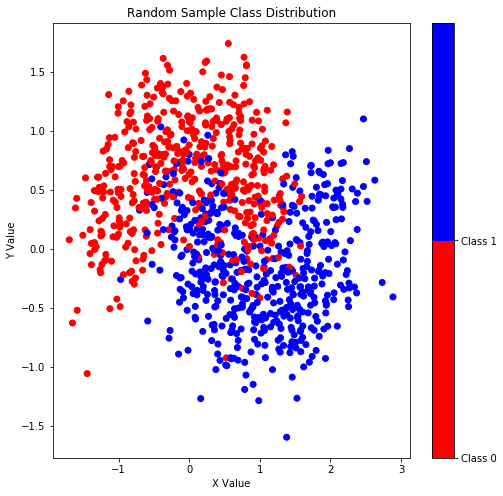

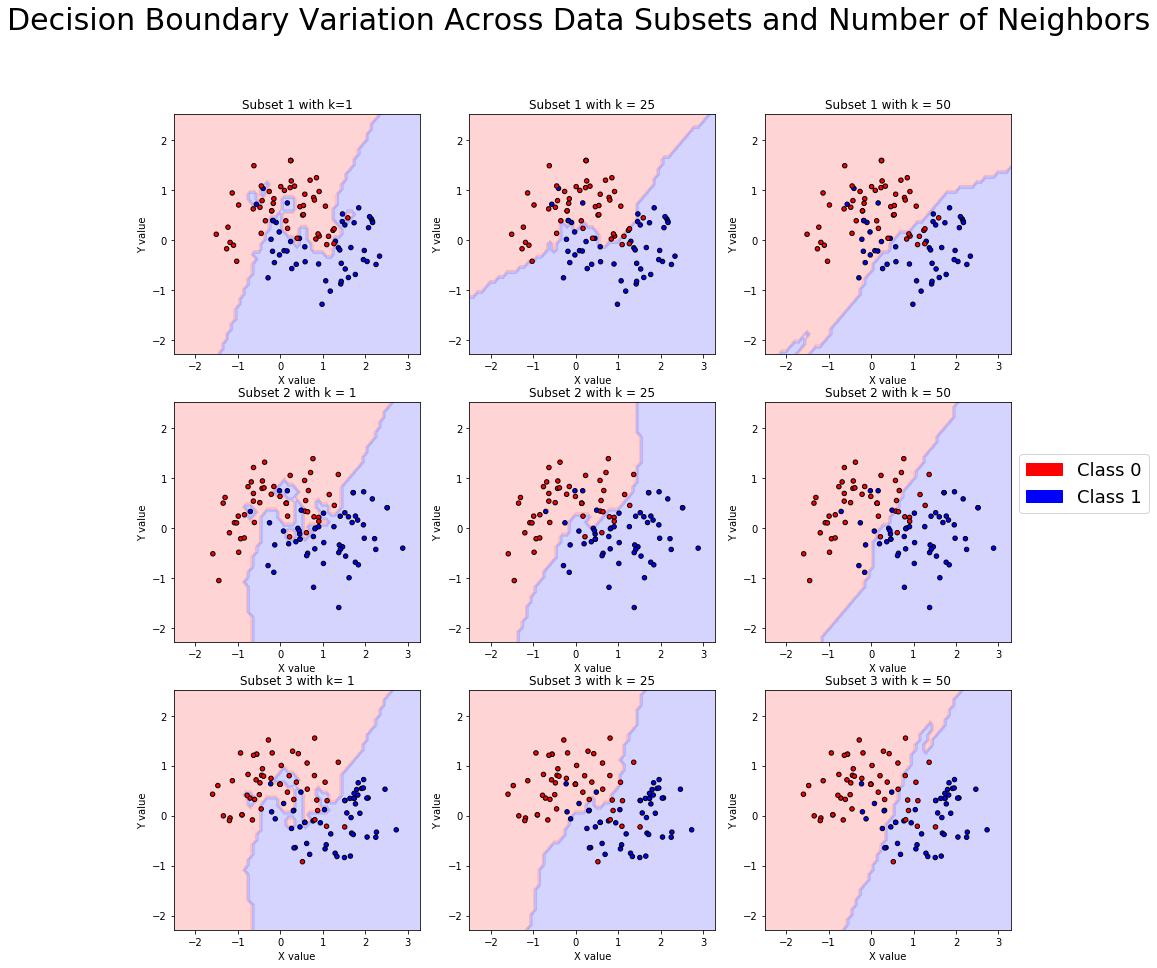

In [14]:
from sklearn.datasets import make_moons 
import matplotlib
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from random import sample
from matplotlib.colors import ListedColormap
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from itertools import product

# A: creating synthetic dataset 
data, label = make_moons(noise = .35, n_samples = 1000) #Data contains x and y values. label contains classes. 

#B: Making scatter plot

#Getting x and y values from data 
x = data[:,0]
y = data[:,1]

colors = ['red','blue'] #Assigning colors for classes 0 and 1. 

fig_1 = plt.figure(figsize=(8,8))
plt.scatter(x, y, c=label, cmap=matplotlib.colors.ListedColormap(colors)) #Plotting data and coloring by class.
plt.title('Random Sample Class Distribution')
plt.xlabel('X Value')
plt.ylabel('Y Value')
cb = plt.colorbar()
loc = np.arange(0,max(label),max(label)/float(len(colors)))
cb.set_ticks(loc)
cb.set_ticklabels(['Class 0', 'Class 1']) #Labeling legend

# C: Creating 3 subsets of data
index_1 = np.random.randint(data.shape[0], size=100)
index_2 = np.random.randint(data.shape[0], size=100)
index_3 = np.random.randint(data.shape[0], size=100)
subset_1 = data[index_1]
label_1 = label[index_1]
subset_2 = data[index_2]
label_2 = label[index_2]
subset_3 = data[index_3]
label_3 = label[index_3]



    
#Fitting models on first subset
model_d1_k1 = KNeighborsClassifier(n_neighbors = 1)
model_d1_k1.fit(subset_1, label_1)
model_d1_k25 = KNeighborsClassifier(n_neighbors = 25)
model_d1_k25.fit(subset_1, label_1)
model_d1_k50 = KNeighborsClassifier(n_neighbors = 50)
model_d1_k50.fit(subset_1, label_1)

#Fitting models on second subset
model_d2_k1 = KNeighborsClassifier(n_neighbors = 1)
model_d2_k1.fit(subset_2, label_2)
model_d2_k25 = KNeighborsClassifier(n_neighbors = 25)
model_d2_k25.fit(subset_2, label_2)
model_d2_k50 = KNeighborsClassifier(n_neighbors = 50)
model_d2_k50.fit(subset_2, label_2)

#Fitting models on third subset
model_d3_k1 = KNeighborsClassifier(n_neighbors = 1)
model_d3_k1.fit(subset_3, label_3)
model_d3_k25 = KNeighborsClassifier(n_neighbors = 25)
model_d3_k25.fit(subset_3, label_3)
model_d3_k50 = KNeighborsClassifier(n_neighbors = 50)
model_d3_k50.fit(subset_3, label_3)


#Creating boundaries for x and y values
x_min, x_max = subset_1[:, 0].min() - 1, subset_1[:, 0].max() + 1
y_min, y_max = subset_1[:, 1].min() - 1, subset_1[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

#Creating figure to store decision boundaries
fig, axs = plt.subplots(3,3, figsize = (15,15)) #Creating space for 9 plots
fig.suptitle("Decision Boundary Variation Across Data Subsets and Number of Neighbors", fontsize=30) #Titling whole figure
red_patch = mpatches.Patch(color='red', label='Class 0') #Generating legend colors and text
blue_patch = mpatches.Patch(color='blue', label='Class 1')
fig.legend(handles=[red_patch, blue_patch], loc = 'center right', fontsize = '18') #Putting legend onto figure


#Iterate over all the models and plot the decision boundaries 
for loc, model, labels, title,inputdata in zip(product([0, 1, 2], [0, 1, 2]),
                        [model_d1_k1, model_d1_k25, model_d1_k50, model_d2_k1, model_d2_k25, model_d2_k50, model_d2_k1, model_d3_k25, model_d3_k50],
                        [label_1, label_1, label_1, label_2, label_2, label_2, label_3, label_3, label_3],
                        ['Subset 1 with k=1', 'Subset 1 with k = 25',
                         'Subset 1 with k = 50', 'Subset 2 with k = 1','Subset 2 with k = 25' ,'Subset 2 with k = 50' ,'Subset 3 with k= 1' ,'Subset 3 with k = 25' , 'Subset 3 with k = 50'],
                        [subset_1, subset_1, subset_1, subset_2, subset_2, subset_2,subset_3, subset_3, subset_3]):

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]) #Generating predictions to be turned into colored regions of classes.
    Z = Z.reshape(xx.shape)
    color_map = ListedColormap(['#FFAAAA', '#AAAAFF']) #Setting colors for background
    #Setting colors for points
    colors = ['red', 'blue']
    cmap = matplotlib.colors.ListedColormap(colors) 
    
    axs[loc[0], loc[1]].contourf(xx, yy, Z, alpha=0.5, cmap = color_map) #Creating semi-transparent background colors by class.
    axs[loc[0], loc[1]].scatter(inputdata[:, 0], inputdata[:, 1], c = labels,
                                  s=20, edgecolor='k', cmap=matplotlib.colors.ListedColormap(colors)) #Plotting points colored by class
    axs[loc[0], loc[1]].set_title(title) #Titling each subplot
    axs[loc[0], loc[1]].set_xlabel('X value') #Labeling axes of each subplot
    axs[loc[0], loc[1]].set_ylabel('Y value')
    




plt.show()

(f) The bias variance tradeoff refers to the idea that models with low bias have higher variance (and vice-versa). Practically, this means that the more flexible a model is (low bias) the more likely it is to erroneously model error in data. However, on the other end of the spectrum, a very inflexible model (high bias) could fail to capture all of the potential information contained in the data. This can be clearly seen in the figure above. The images on the left side show a very flexible model, while the images on the right side show an inflexible model. The flexible models (k=1) have high variance with fit shapes that vary wildly across each subset of the data. The less flexible models (k=50) have low variance with constistent and relatively linear fits across each of the subsets. The flexible low bias models classify more points correctly than the inflexible high bias models.

## 6
**[20 points] Bias-variance trade-off II: Quantifying the tradeoff**. This exercise will explore the impact of the bias-variance tradeoff on classifier performance by looking at classifier decision boundaries.

Here, the value of $k$ determines how flexible our model is.

**(a)** Using the function created earlier to generate random samples (using the `make_moons` function), create a new set of 1000 random samples, and call this dataset your test set and the previously created dataset your training set.

**(b)** Train a kNN classifier on your training set for $k = 1,2,...500$. Apply each of these trained classifiers to both your training dataset and your test dataset and plot the classification error (fraction of mislabeled datapoints).

**(c)** What trend do you see in the results?

**(d)** What values of $k$ represent high bias and which represent high variance?

**(e)** What is the optimal value of $k$ and why?

**(f)** In kNN classifiers, the value of k controls the flexibility of the model - what controls the flexibility of other models?

**ANSWER**

In [35]:
# a) Creating training and test data
train_data = data
train_label = label
test_data, test_label = make_moons(noise = .35, n_samples = 1000)


# b) Training knn model using k values from 1 to 500.
train_class_err = []
test_class_err = []
x = list(range(1,501))
for k in (range(1,501)):
    model_k = KNeighborsClassifier(n_neighbors = k)
    train_data_fit = model_k.fit(train_data, label)
    train_data_pred_label = model_k.predict(train_data)
    test_data_pred_label = model_k.predict(test_data)
    train_error_k = 1 - accuracy(train_label, train_data_pred_label)
    test_error_k  = 1- accuracy (test_label,test_data_pred_label)
    train_class_err.append(train_error_k)
    test_class_err.append(test_error_k)



Text(0.5, 1.0, 'Training and Test Error Across K-Values')

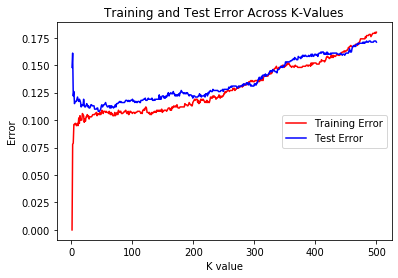

In [41]:
plt.plot(x, train_class_err, color='red', label='Training Error')
plt.plot(x, test_class_err, color='blue', label='Test Error')
plt.xlabel('K value')
plt.ylabel('Error')
plt.legend(loc= 'center right')
plt.title('Training and Test Error Across K-Values')

## 7
**[20 points] Linear regression and nonlinear transformations**. You're given training and testing data contained in files "A2_Q7_train.csv" and "A2_Q7_test.csv" in the "data" folder for this assignment. Your goal is to develop a regression algorithm from the training data that performs well on the test data.

*Hint: Use the scikit learn [LinearRegression](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) module.*

**(a)** Create a scatter plot of your training data.

**(b)** Estimate a linear regression model ($y = a_0 + a_1 x$) for the training data and calculate both the $R^2$ value and mean square error for the fit of that model for the training data. Also provide the equation representing the estimated model (e.g. $y = a_0 + a_1 x$, but with the estimated coefficients inserted.

**(c)** If features can be nonlinearly transformed, a linear model may incorporate those non-linear feature transformation relationships in the training process. From looking at the scatter plot of the training data, choose a transformation of the predictor variable, $x$ that may make sense for these data. This will be a multiple regression model of the form $y = a_0 + a_1 x_1 + a_2 x_2 + \ldots + a_n x_n$. Here $x_i$ could be any transformations of x - perhaps it's $\frac{1}{x}$, $log(x)$, $sin(x)$, $x^k$ (where $k$ is any power of your choosing). Provide the estimated equation for this multiple regression model (e.g. if you chose your predictors to be $x_1 = x$ and $x_2 = log(x)$, your model would be of the form $y = a_0 + a_1 x + a_2 log(x)$. Also provide the $R^2$ and mean square error of the fit for the training data.

**(d)** Using both of the models you created here in (b) and (c), plot the original data (as a scatter plot) and the two curves representing your models (each as a separate line).

**(e)** Using the models above, apply them to the test data and estimate the $R^2$ and mean square error of the test dataset.

**(f)** Which models perform better on the training data, and which on the test data? Why?

**(g)** Imagine that the test data were significantly different from the training dataset. How might this affect the predictive capability of your model? Why?

**ANSWER**

In [70]:
#Reading in data
train_reg_data = genfromtxt('A2_Q7_train.csv', delimiter=',', skip_header=1)
test_reg_data = genfromtxt('A2_Q7_test.csv', delimiter=',', skip_header=1)
# Scatterplot

[[  0.          -0.25459881  45.83558005]
 [  1.           5.50714306  68.44815236]
 [  2.           3.31993942  -0.95103105]
 [  3.           1.98658484  -4.02499172]
 [  4.          -2.4398136  -16.37482564]
 [  5.          -2.4400548    2.58739824]
 [  6.          -3.41916388 -20.35432273]
 [  7.           4.66176146  53.96308606]
 [  8.           2.01115012  11.9061653 ]
 [  9.           3.08072578 -43.4225809 ]
 [ 10.          -3.79415506 -18.12500676]
 [ 11.           5.69909852  65.53576707]
 [ 12.           4.32442641   0.8207371 ]
 [ 13.          -1.87660889  43.99722967]
 [ 14.          -2.18175033  50.78320174]
 [ 15.          -2.1659549   48.52101091]
 [ 16.          -0.95757757  10.51659074]
 [ 17.           1.24756432   3.00037727]
 [ 18.           0.31945019  29.8747671 ]
 [ 19.          -1.0877086   56.13937126]
 [ 20.           2.11852895  -9.42793392]
 [ 21.          -2.60506139  12.44306684]
 [ 22.          -1.07855351   4.08063712]
 [ 23.          -0.33638157  -1.85

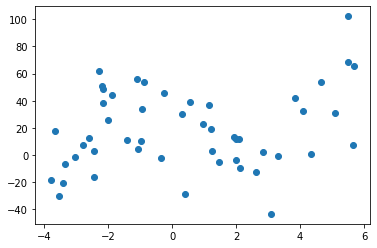

In [64]:
# A) Scatterplot of training data
plt.scatter(train_reg_data[:,1], train_reg_data[:,2])

In [69]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

# B) Creating linear regression model.
x_train_reg = train_reg_data[:,1]
y_train_reg = train_reg_data[:,2]
regression_model = LinearRegression()

#Reshaping x values so they work properly
x_train_reg = x_train_reg.reshape(-1,1)
regression_model.fit(x_train_reg,y_train_reg)
predict_y = regression_model.predict(x_train_reg)
print(mean_squared_error(predict_y, y_train_reg))
print(r2_score(predict_y, y_train_reg))



791.4167471701106
-13.417529902100801


In [ ]:
#Transform data 
x_train_trans =(x_train_reg**3, x_train_reg**2)
regression_trans = LinearRegression()
regression_trans.fit(x_train_trans, y_train_reg)
predict_y_trans = regression_trans.predict(x_train_trans)
print(mean_squared_error(predict_y_trans, y_train_reg))
print(r2_score(predict_y_trans, y_train_reg))